In [ ]:
%matplotlib inline


# Structural similarity index


When comparing images, the mean squared error (MSE)--while simple to
implement--is not highly indicative of perceived similarity.  Structural
similarity aims to address this shortcoming by taking texture into account
[1]_, [2]_.

The example shows two modifications of the input image, each with the same MSE,
but with very different mean structural similarity indices.

.. [1] Zhou Wang; Bovik, A.C.; ,"Mean squared error: Love it or leave it? A new
       look at Signal Fidelity Measures," Signal Processing Magazine, IEEE,
       vol. 26, no. 1, pp. 98-117, Jan. 2009.

.. [2] Z. Wang, A. C. Bovik, H. R. Sheikh and E. P. Simoncelli, "Image quality
       assessment: From error visibility to structural similarity," IEEE
       Transactions on Image Processing, vol. 13, no. 4, pp. 600-612,
       Apr. 2004.



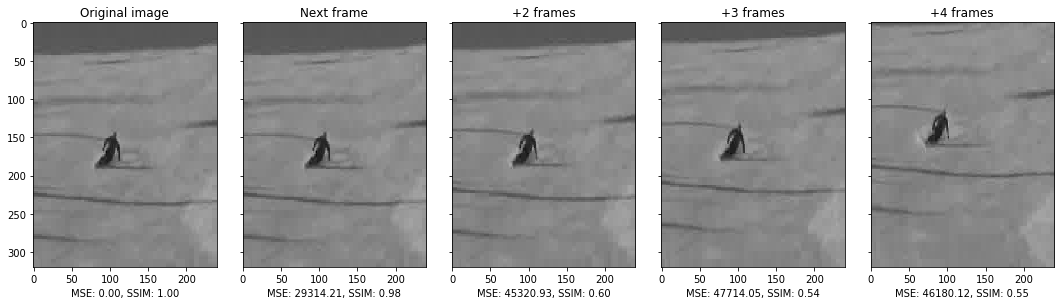

In [52]:
%matplotlib inline
from keras.preprocessing.image import img_to_array, load_img
import sys
sys.path.append('/home/linkermann/Desktop/MA/opticalFlow/opticalFlowGAN')
import tflib.save_images
import IPython.core.display
import PIL
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, img_as_ubyte
from skimage.measure import compare_ssim as ssim
from skimage.color import rgb2gray

def process_image(image, target_shape):
    h, w, c = target_shape
    image = load_img(image, target_size=(h, w))
    img_arr = img_to_array(image) # Turn it into numpy
    x = img_arr.astype(np.uint8)
    x = x.reshape(h,w,c)
    x = img_as_float(x)
    x = rgb2gray(x)
    return x

def show(image): # to show np array as image
    IPython.display.display(PIL.Image.fromarray(image))

inpath = "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0021.jpg"
inpath2 = "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0022.jpg"
inpath3 = "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0023.jpg"
inpath4 = "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0024.jpg"
inpath5 = "/home/linkermann/Desktop/MA/data/train/Skiing/v_Skiing_g08_c01-0025.jpg"
outpath = "/home/linkermann/Desktop/MA/opticalFlow/opticalFlowGAN/data/ssimtest/v_Skiing_g08_c01-0001"

img = process_image(inpath, (320,240,3))
img2 = process_image(inpath2, (320,240,3))
img3 = process_image(inpath3, (320,240,3))
img4 = process_image(inpath4, (320,240,3))
img5 = process_image(inpath5, (320,240,3))

rows, cols = img.shape

def mse(x, y):
    return np.linalg.norm(x - y)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4), sharex=True, sharey=True)
ax = axes.ravel()

# to 0-255 for mse calculation
img = img_as_ubyte(img)
img2 = img_as_ubyte(img2)
img3 = img_as_ubyte(img3)
img4 = img_as_ubyte(img4)
img5 = img_as_ubyte(img5)

mse_none = mse(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_1 = mse(img, img2)
ssim_1 = ssim(img, img2, data_range=img2.max() - img2.min())

mse_2 = mse(img, img3)
ssim_2 = ssim(img, img3, data_range=img3.max() - img3.min())

mse_3 = mse(img, img4)
ssim_3 = ssim(img, img4, data_range=img4.max() - img4.min())

mse_4 = mse(img, img5)
ssim_4 = ssim(img, img5, data_range=img5.max() - img5.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

# to float for displaying
img = img_as_float(img)
img2 = img_as_float(img2)
img3 = img_as_float(img3)
img4 = img_as_float(img4)
img5 = img_as_float(img5)

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('Original image')

ax[1].imshow(img2, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_1, ssim_1))
ax[1].set_title('Next frame')

ax[2].imshow(img3, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_2, ssim_2))
ax[2].set_title('+2 frames')

ax[3].imshow(img4, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[3].set_xlabel(label.format(mse_3, ssim_3))
ax[3].set_title('+3 frames')

ax[4].imshow(img5, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[4].set_xlabel(label.format(mse_4, ssim_4))
ax[4].set_title('+4 frames')

plt.tight_layout()
plt.show()

fig.savefig('/home/linkermann/Desktop/MA/opticalFlow/opticalFlowGAN/data/ssimtest/mse_ssim_test_successive4.png')
plt.close(fig)